In [2]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df2 = pd.read_csv('D:\SierraChart\SavedTradeActivity\TradesListAllSim.txt', sep='\t')
df = pd.read_csv("C:\\SierraChart\\SavedTradeActivity\\perfect_monday.txt", sep='\t')

In [38]:
df['Account'].tail(3)

18    Sim2
19    Sim2
20     NaN
Name: Account, dtype: object

In [17]:
df.columns

Index(['Symbol', 'Trade Type', 'Entry DateTime', 'Exit DateTime',
       'Entry Price', 'Exit Price', 'Trade Quantity', 'Max Open Quantity',
       'Max Closed Quantity', 'Profit/Loss (C)', 'Cumulative Profit/Loss (C)',
       'Max Open Profit (C)', 'Max Open Loss (C)',
       'FlatToFlat Profit/Loss (C)', 'FlatToFlat Max Open Profit (C)',
       'FlatToFlat Max Open Loss (C)', 'Entry Efficiency', 'Exit Efficiency',
       'Total Efficiency', 'High Price While Open', 'Commission (C)',
       'Low Price While Open', 'Note', 'Open Position Quantity',
       'Close Position Quantity', 'Duration', 'Account'],
      dtype='object')

In [39]:
print(df['Account'] == 'Sim2')

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
Name: Account, dtype: bool


In [29]:
def choose_acc(acc):
    max_profit = df['Max Open Profit (C)'][df['Account'] ==acc].fillna(0)
    max_loss = df['Max Open Loss (C)'][df['Account'] ==acc].fillna(0)
    result = df['Profit/Loss (C)'][df['Account'] ==acc].fillna(0)
    
    return max_profit, max_loss, result

In [40]:
max_profit, max_loss, result = choose_acc('Sim2')

In [47]:
result.tail()

15     225.00
16    -125.00
17     500.00
18     400.00
19       0.00
Name: Profit/Loss (C), dtype: object

In [44]:
for x in max_loss:
    print(x)

-74.99
-125.01
-100.01
-300.01
-324.99
-300.0
-50.01
-74.99
-300.0
-150.01
-25.01
-324.99
-350.0
0.0
-300.0
-25.01
-125.01
-149.99
-24.99
-124.99


In [43]:
data = []
depo_dict = {}
for sl in np.arange(-12.5,-301,-12.5):
    ml = 0
    mp = 0
    mop = 0
    dd = 0
    wynik = []
    depo_name = f'depo_{sl}'
    depo_dict[depo_name] = []
    
    for loss, profit, op in zip(max_loss[:-2], result[:-2], max_profit[:-2]):
        if loss <= sl:
            wynik.append(sl)
        else:
            wynik.append(float(profit))
            mop = mp + float(op)
       
        w = sum(wynik)
        depo_dict[depo_name].append(w)
        current_dd = mp - w
        if w >= mp:
            mp = w
        elif w < ml:
            ml = w

        if current_dd > dd:
            dd = current_dd
    
    data.append([sl, w, ml, mp, mop, dd])
headers = ['sl', 'result', 'max loss', 'max profit', 'max open profit', 'drawdown']

print(tabulate(data, headers=headers, tablefmt="plain"))

    sl    result    max loss    max profit    max open profit    drawdown
 -12.5     587.5      -162.5         637.5             849.99       162.5
 -25       375        -325           475               849.99       325
 -37.5     762.5      -375           837.5            1024.99       375
 -50       575        -500           675               874.99       500
 -62.5    1750        -375          1875              2087.49       375
 -75      2450        -100          2600              2824.99       375
 -87.5    2300        -162.5        2475              2712.49       437.5
-100      2150        -225          2350              2599.99       500
-112.5    2212.5       -75          2437.5            2699.99       350
-125      2075        -125          2325              2599.99       400
-137.5    2337.5         0          2600              2699.99       412.5
-150      2875           0          2875              3000.01       450
-162.5    3637.5         0          3637.5            37

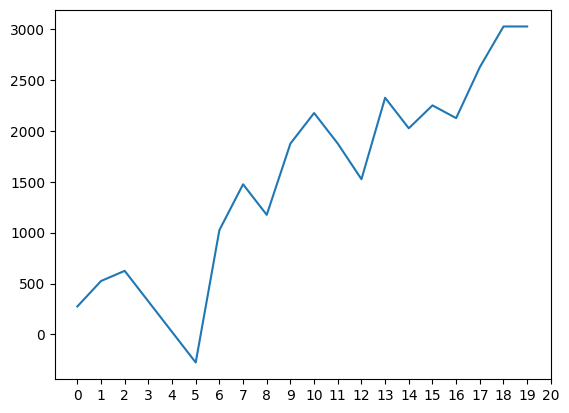

In [42]:
df['Cumulative Profit/Loss (C)'].plot()
plt.xticks(range(len(df)))
plt.show()

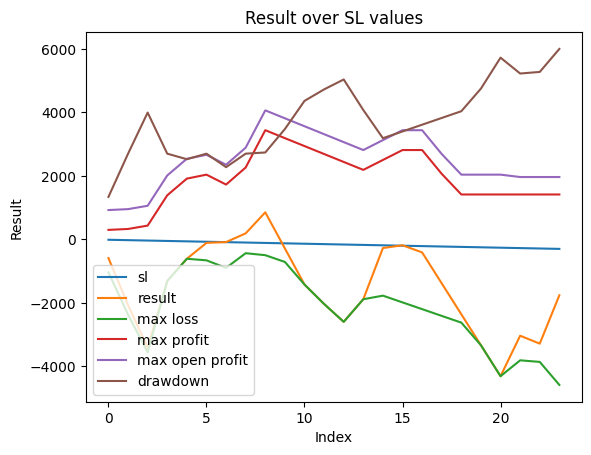

In [91]:
df2 = pd.DataFrame(data, columns=headers)

# Rysowanie wykresu
df2.plot(title='Result over SL values')
plt.xlabel('Index')
plt.ylabel('Result')
plt.show()

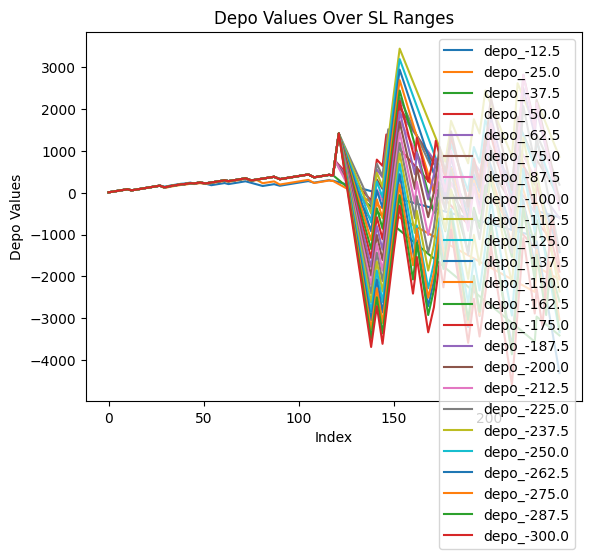

In [92]:
df3 = pd.DataFrame(depo_dict)

# Rysowanie wykresu
df3.plot(title='Depo Values Over SL Ranges')
plt.xlabel('Index')
plt.ylabel('Depo Values')
plt.show()

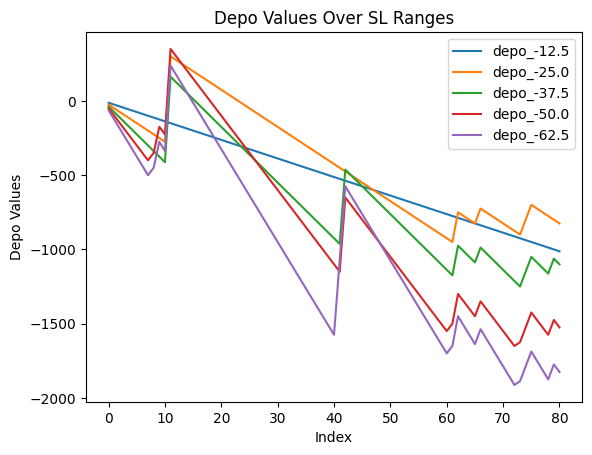

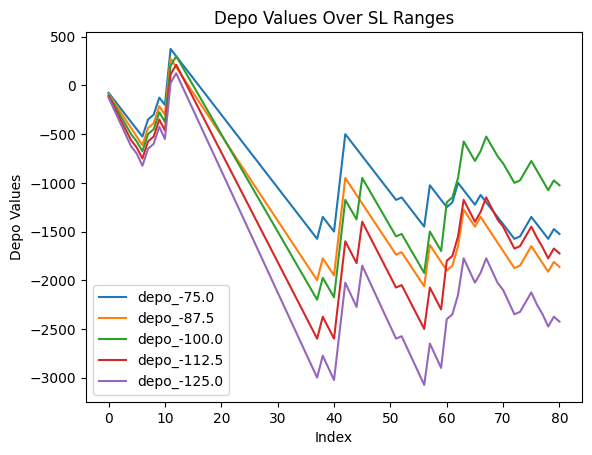

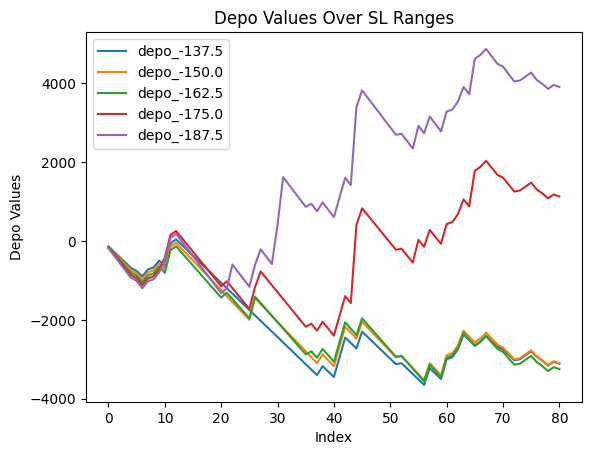

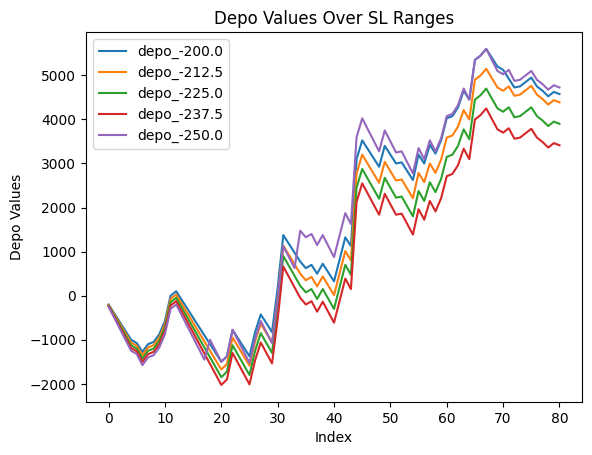

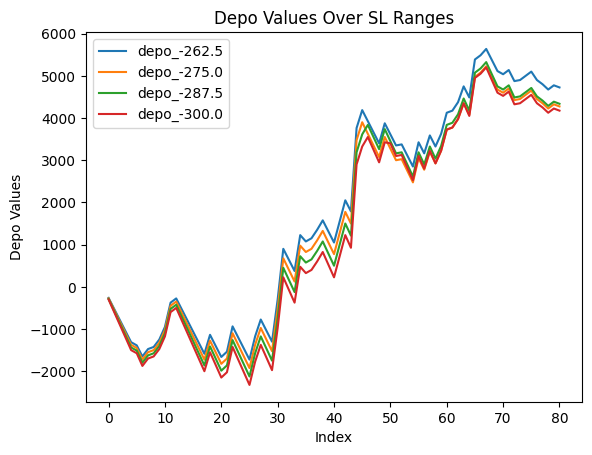

In [87]:
n = 5
columns = list(depo_dict.keys())
for i in range(0, len(columns), n):
    df3[columns[i:i+n]].plot(title='Depo Values Over SL Ranges')
    plt.xlabel('Index')
    plt.ylabel('Depo Values')
    plt.show()

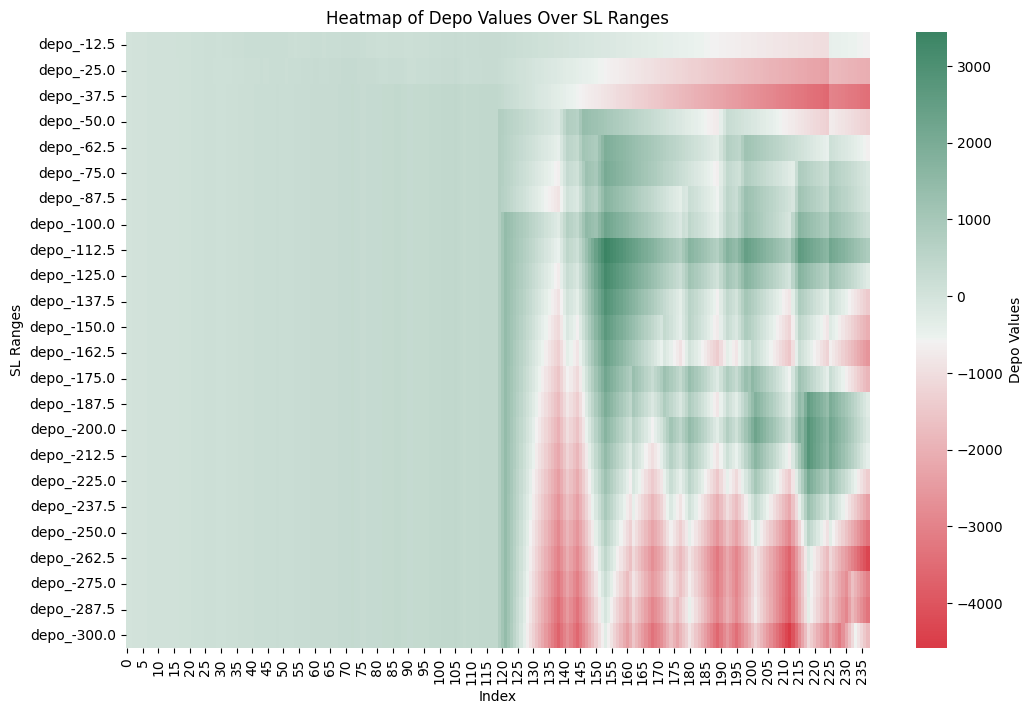

In [99]:
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df3.transpose(), cmap=cmap, cbar_kws={'label': 'Depo Values'})
plt.title('Heatmap of Depo Values Over SL Ranges')
plt.xlabel('Index')
plt.ylabel('SL Ranges')
plt.show()